In [1]:
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
def read_data(filename):
    x = []
    y = []
    dx = []
    dy = []

    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader, None)
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
            dx.append(float(row[2]))
            dy.append(float(row[3]))

    return headers, x, y, dx, dy

In [15]:
# Step 3a: Define a quadratic fit function
def fitfunction(x, *param):
    return -0.5*param[0]*x*x + param[1]*x + param[2]

In [16]:
# Step 1:  Read the data into appropriate data structures
file_name = "Projectile.csv"
header_values, xi, yi, dxi, dyi = read_data(file_name)

print(header_values)
print(xi, yi, dxi, dyi)

['Time', 'Height', 'dTime', 'dHeight']
[0.0, 0.08275862068965517, 0.16551724137931034, 0.2482758620689655, 0.3310344827586207, 0.41379310344827586, 0.496551724137931, 0.5793103448275863, 0.6620689655172414, 0.7448275862068965, 0.8275862068965517, 0.9103448275862069, 0.993103448275862, 1.0758620689655172, 1.1586206896551725, 1.2413793103448276, 1.3241379310344827, 1.4068965517241379, 1.489655172413793, 1.5724137931034483, 1.6551724137931034, 1.7379310344827585, 1.8206896551724139, 1.903448275862069, 1.986206896551724, 2.0689655172413794, 2.1517241379310343, 2.2344827586206897, 2.317241379310345, 2.4] [1.9373414209398032, 2.8547822086980608, 4.204489276570552, 4.849628571274707, 5.709590755974864, 6.068324599579454, 7.096311647358293, 7.888810626734119, 8.449290032611637, 8.603400093765362, 9.260994962913841, 9.68776250171372, 10.56730199210973, 10.631473408839653, 10.99450591408078, 10.24349514148985, 10.48641818454371, 10.776393046664978, 10.212661111857619, 10.226725710909012, 10.3360

(0.0, 11.726817828681353)

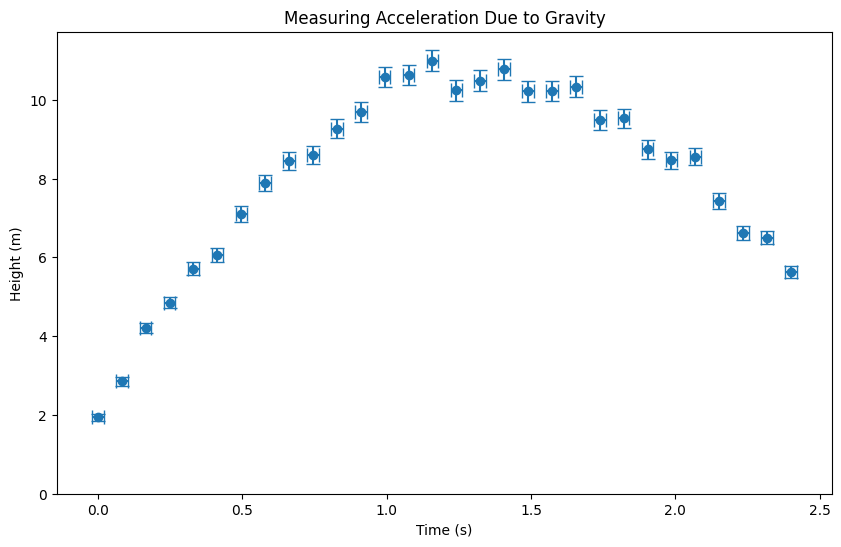

In [24]:
# Step 2: Basic plot of the data with error bars, plot title, and axis labels
fig = plt.subplots(1,1, figsize=(10, 6))
plt.errorbar(xi, yi, xerr=dxi, yerr=dyi, fmt='o', label="Data", capsize=5.0)
plt.title("Measuring Acceleration Due to Gravity")
plt.xlabel(header_values[0]+ " (s)")
plt.ylabel(header_values[1] + " (m)")

# Make sure lower limit of y-axis is zero!
plt.ylim(0)


In [25]:
# Step 3b:  Fit the data
init_vals = [0 for x in range(3)]
popt, pcov = curve_fit(fitfunction, xi, yi, p0=init_vals, sigma=dyi, absolute_sigma=True)

print(popt)
print(pcov)

[ 9.41834186 12.75522076  1.95870203]
[[ 0.01964792  0.02210414 -0.00496008]
 [ 0.02210414  0.02649239 -0.00706587]
 [-0.00496008 -0.00706587  0.00377463]]


In [26]:
# Step 3c:  Extract the fit parameters, with uncertainties
perr = np.sqrt(np.diag(pcov))
a = popt[0]
b = popt[1]
c = popt[2]
da = perr[0]
db = perr[1]
dc = perr[2]
print(f'Fit Result: y = -0.5({a:.5f} +/- {da:.5f})x^2 + ({b:.5f} +/- {db:.5f})x + ({c:.5f} +/- {dc:.5f})')

Fit Result: y = -0.5(9.41834 +/- 0.14017)x^2 + (12.75522 +/- 0.16276)x + (1.95870 +/- 0.06144)


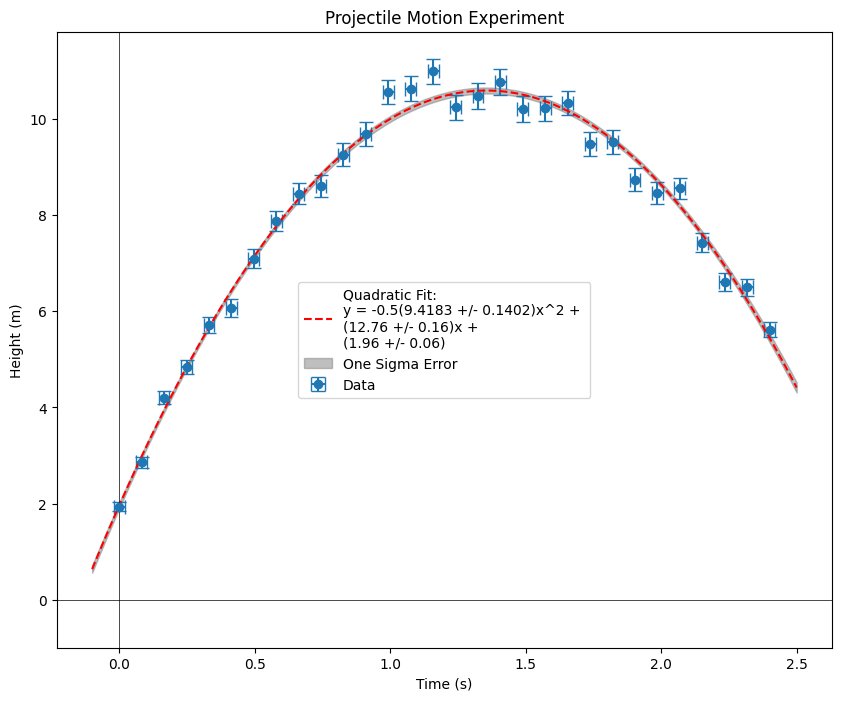

In [33]:
# Step 2: Basic plot of the data with error bars, plot title, and axis labels
fig2 = plt.subplots(1,1, figsize=(10, 8))
plt.errorbar(xi, yi, xerr=dxi, yerr=dyi, fmt='o', label="Data", capsize=5.0)
plt.title("Projectile Motion Experiment")
plt.xlabel(header_values[0]+ " (s)")
plt.ylabel(header_values[1]+ " (m)")

# Possibly, choose logarithmic x and/or y scales.
# plt.xscale('log')
# plt.yscale('log')
#
# Step 3d:  Plot the fit result
xlow = -0.1
xhigh = 2.5
xfit = np.linspace(xlow, xhigh, 100)
yfit = fitfunction(xfit,*popt)

plt.plot(xfit,yfit,'r--', label = f"Quadratic Fit: \ny = -0.5({a:.4f} +/- {da:.4f})x^2 + \n({b:.2f} +/- {db:.2f})x + \n({c:.2f} +/- {dc:.2f})")

# Step 4:  Plot the error band

plot_error_band = True

if plot_error_band:
    ps = np.random.multivariate_normal(popt,pcov,10000)
    ysample = np.asarray([fitfunction(xfit,*pi) for pi in ps])

    lower = np.percentile(ysample, 16.0, axis=0)
    upper = np.percentile(ysample, 84.0, axis=0)

    plt.fill_between(xfit,lower,upper,color='gray',alpha=0.5, label='One Sigma Error')
    
# Draw x and y axes
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# Change y lower limit
plt.ylim(-1)

plt.legend()
plt.show()